In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('../')
from python_code import model, pollsmodel
os.chdir('notebooks')
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})
from sklearn.linear_model import LinearRegression
from python_code import model

In [5]:
df = pd.read_csv('../../data/polls.csv').dropna()
age = pd.get_dummies(df['age'])
edu = pd.get_dummies(df['edu'])
df = df.join(age).join(edu)
df.insert(0,'intercept',1)
columns_to_remove = ['org', 'year', 'survey','age','edu']
df = df.drop(columns=columns_to_remove)

In [6]:
groups = df.groupby('state')
states = list(groups.groups.keys())

In [7]:
X_states = []
y_states = []
for state in states:
    df_group = groups.get_group(state)
    X_states.append(df_group.drop(columns=['state','bush']).to_numpy())
    y_states.append(df_group['bush'].to_numpy())
    

In [8]:
model = pollsmodel.Model(X_states, y_states, n_iter=3000)
model.fit()

100%|████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [04:56<00:00, 10.12it/s]


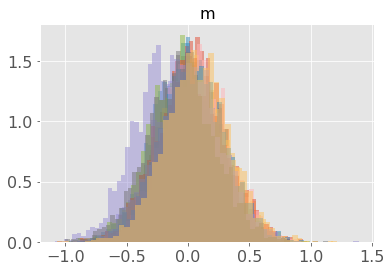

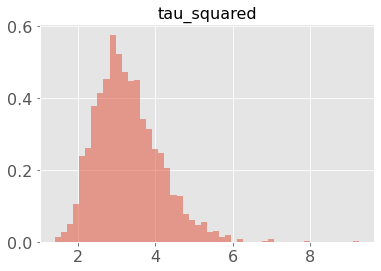

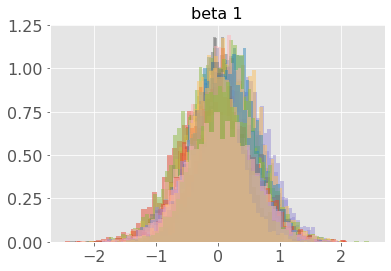

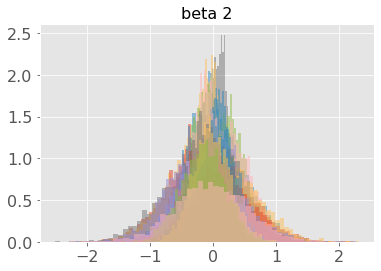

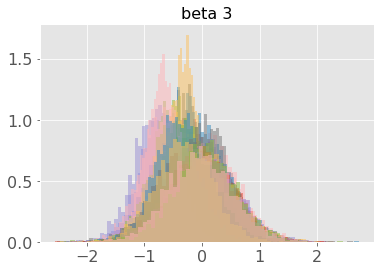

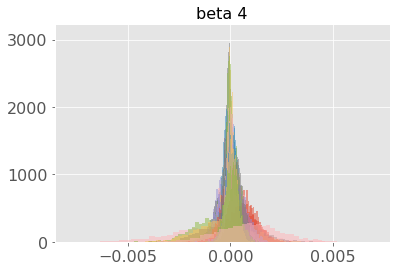

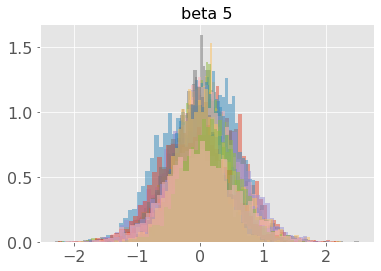

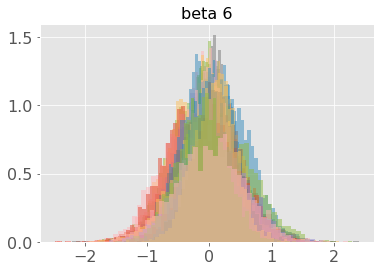

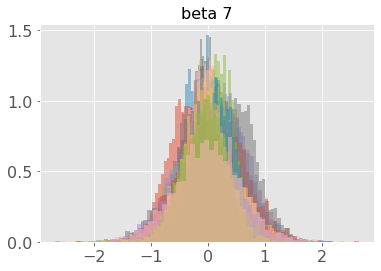

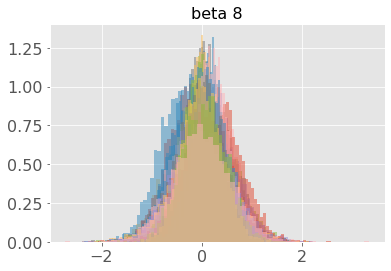

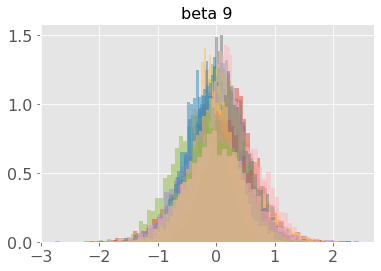

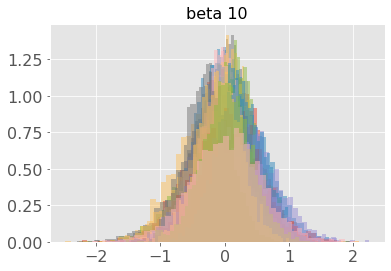

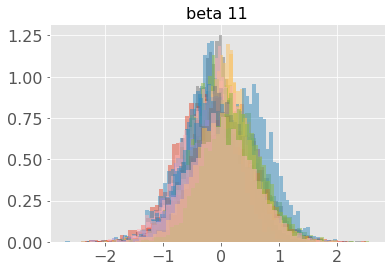

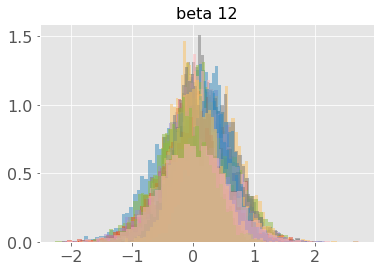

<Figure size 432x288 with 0 Axes>

In [9]:
model.plot_all_histograms()

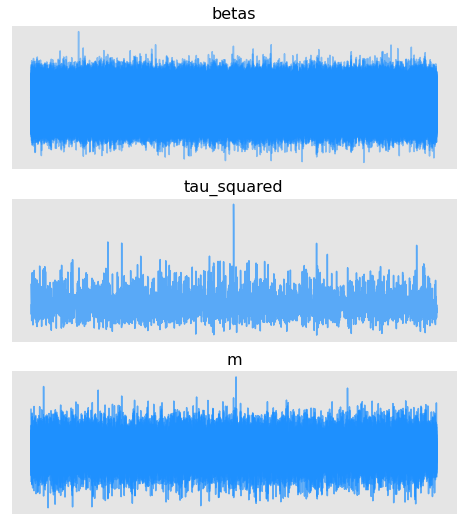

In [10]:
model.plot_all_traces()

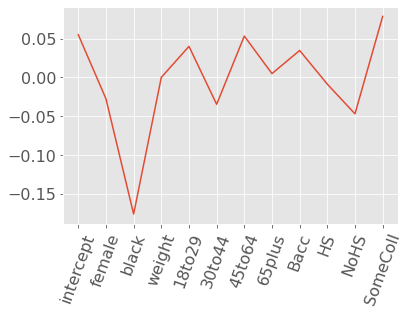

In [11]:
plt.plot(df.drop(columns=['state','bush']).columns, model.traces['betas'].mean(axis=0).mean(axis=1))
plt.xticks(rotation=70);

In [ ]:
df.columns